# **Task 4**
* Name: DEVANSHU GUPTA
* Reg.No.: 21BCE0597
* Email id: devanshu.gupta2021@vitstudent.ac.in
* Branch: CSE
* Campus: VIT Vellore
* Learning Track: AI & ML in collab. with Google (Applied Data Science)
* Batch: Evening (6pm - 8pm)
* Github Link: https://github.com/devanshu0602/Applied-Data-Science/tree/main/Task%204

***Project Title***: Grapes to Greatness: Machine Learning in Wine Quality Prediction

<br>

***Description***: Predicting wine quality using machine learning is a common and valuable application in the field of data science and analytics. Wine quality prediction involves building a model that can assess and predict the quality of a wine based on various input features, such as chemical composition, sensory characteristics, and environmental factors.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

<br>

***Dataset***: [Link](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Task 4.1 --> Load the dataset

In [2]:
dataset = pd.read_csv('/content/winequality-red.csv')
df = dataset.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Task 4.2 --> Data Preprocessing including visualization

* Information check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* Checking for missing values or null values

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* Descriptive statistics

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Visualization

* Scatter plot to show the relation between pH and Density of Wine

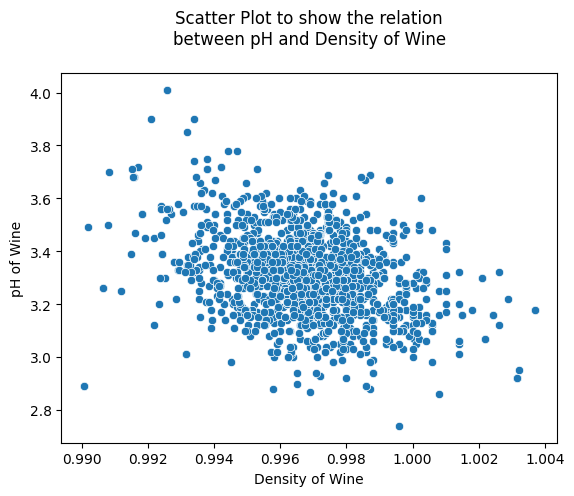

In [6]:
sns.scatterplot(
    data = df,
    x = 'density',
    y = 'pH'
)

plt.xlabel('Density of Wine')
plt.ylabel('pH of Wine')
plt.title('Scatter Plot to show the relation\nbetween pH and Density of Wine\n')
plt.show()

* Line plot to show the relation between the amount of Free Sulfur Dioixide and levels of Fixed Acidity

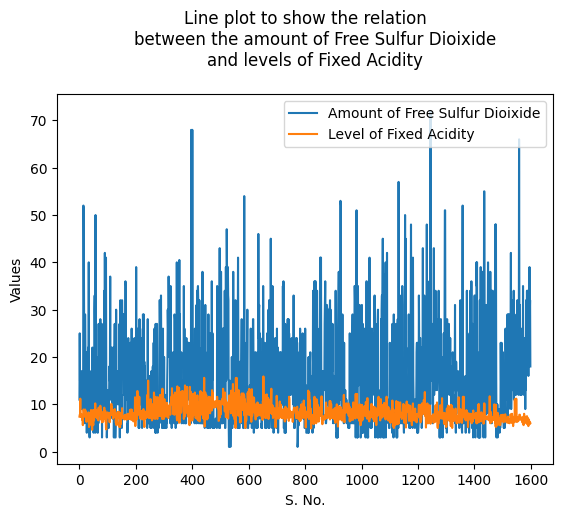

In [7]:
sns.lineplot(
    df['free sulfur dioxide'],
    label = 'Amount of Free Sulfur Dioixide'
)
sns.lineplot(
    df['fixed acidity'],
    label = 'Level of Fixed Acidity'
)

plt.xlabel('S. No.')
plt.ylabel('Values')
plt.legend()
plt.title(
    '''Line plot to show the relation
    between the amount of Free Sulfur Dioixide
    and levels of Fixed Acidity\n'''
)
plt.show()

* Checking the correlation between data

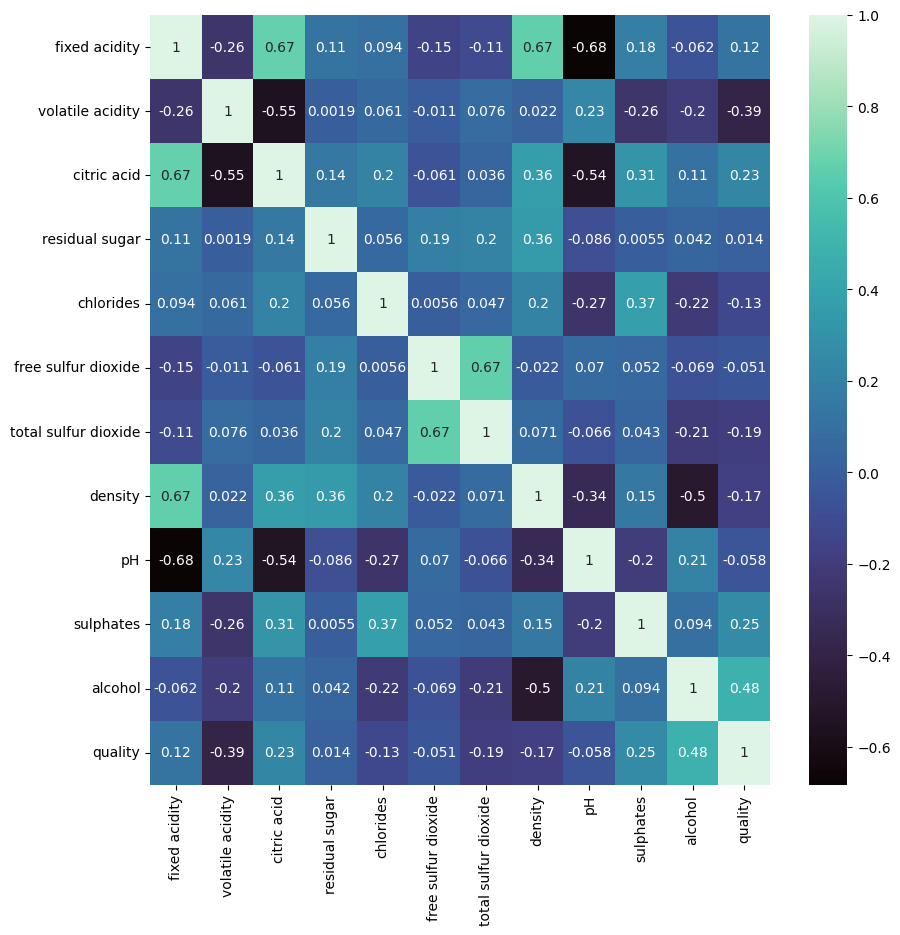

In [8]:
df_correlation = df.corr()

plt.figure(figsize = [10, 10])

sns.heatmap(
    df_correlation,
    annot = True,
    cmap = "mako"
)

plt.show()

* Correlation of each column with quality

In [9]:
df_correlation['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

* Value counts of each type of quality

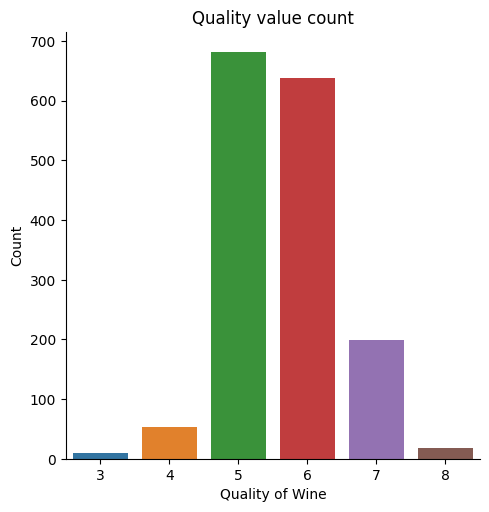

In [10]:
sns.catplot(
    data = df,
    x = 'quality',
    kind = 'count'
)

plt.title("Quality value count")
plt.xlabel("Quality of Wine")
plt.ylabel("Count")
plt.show()

* Data visualization of quality with other values

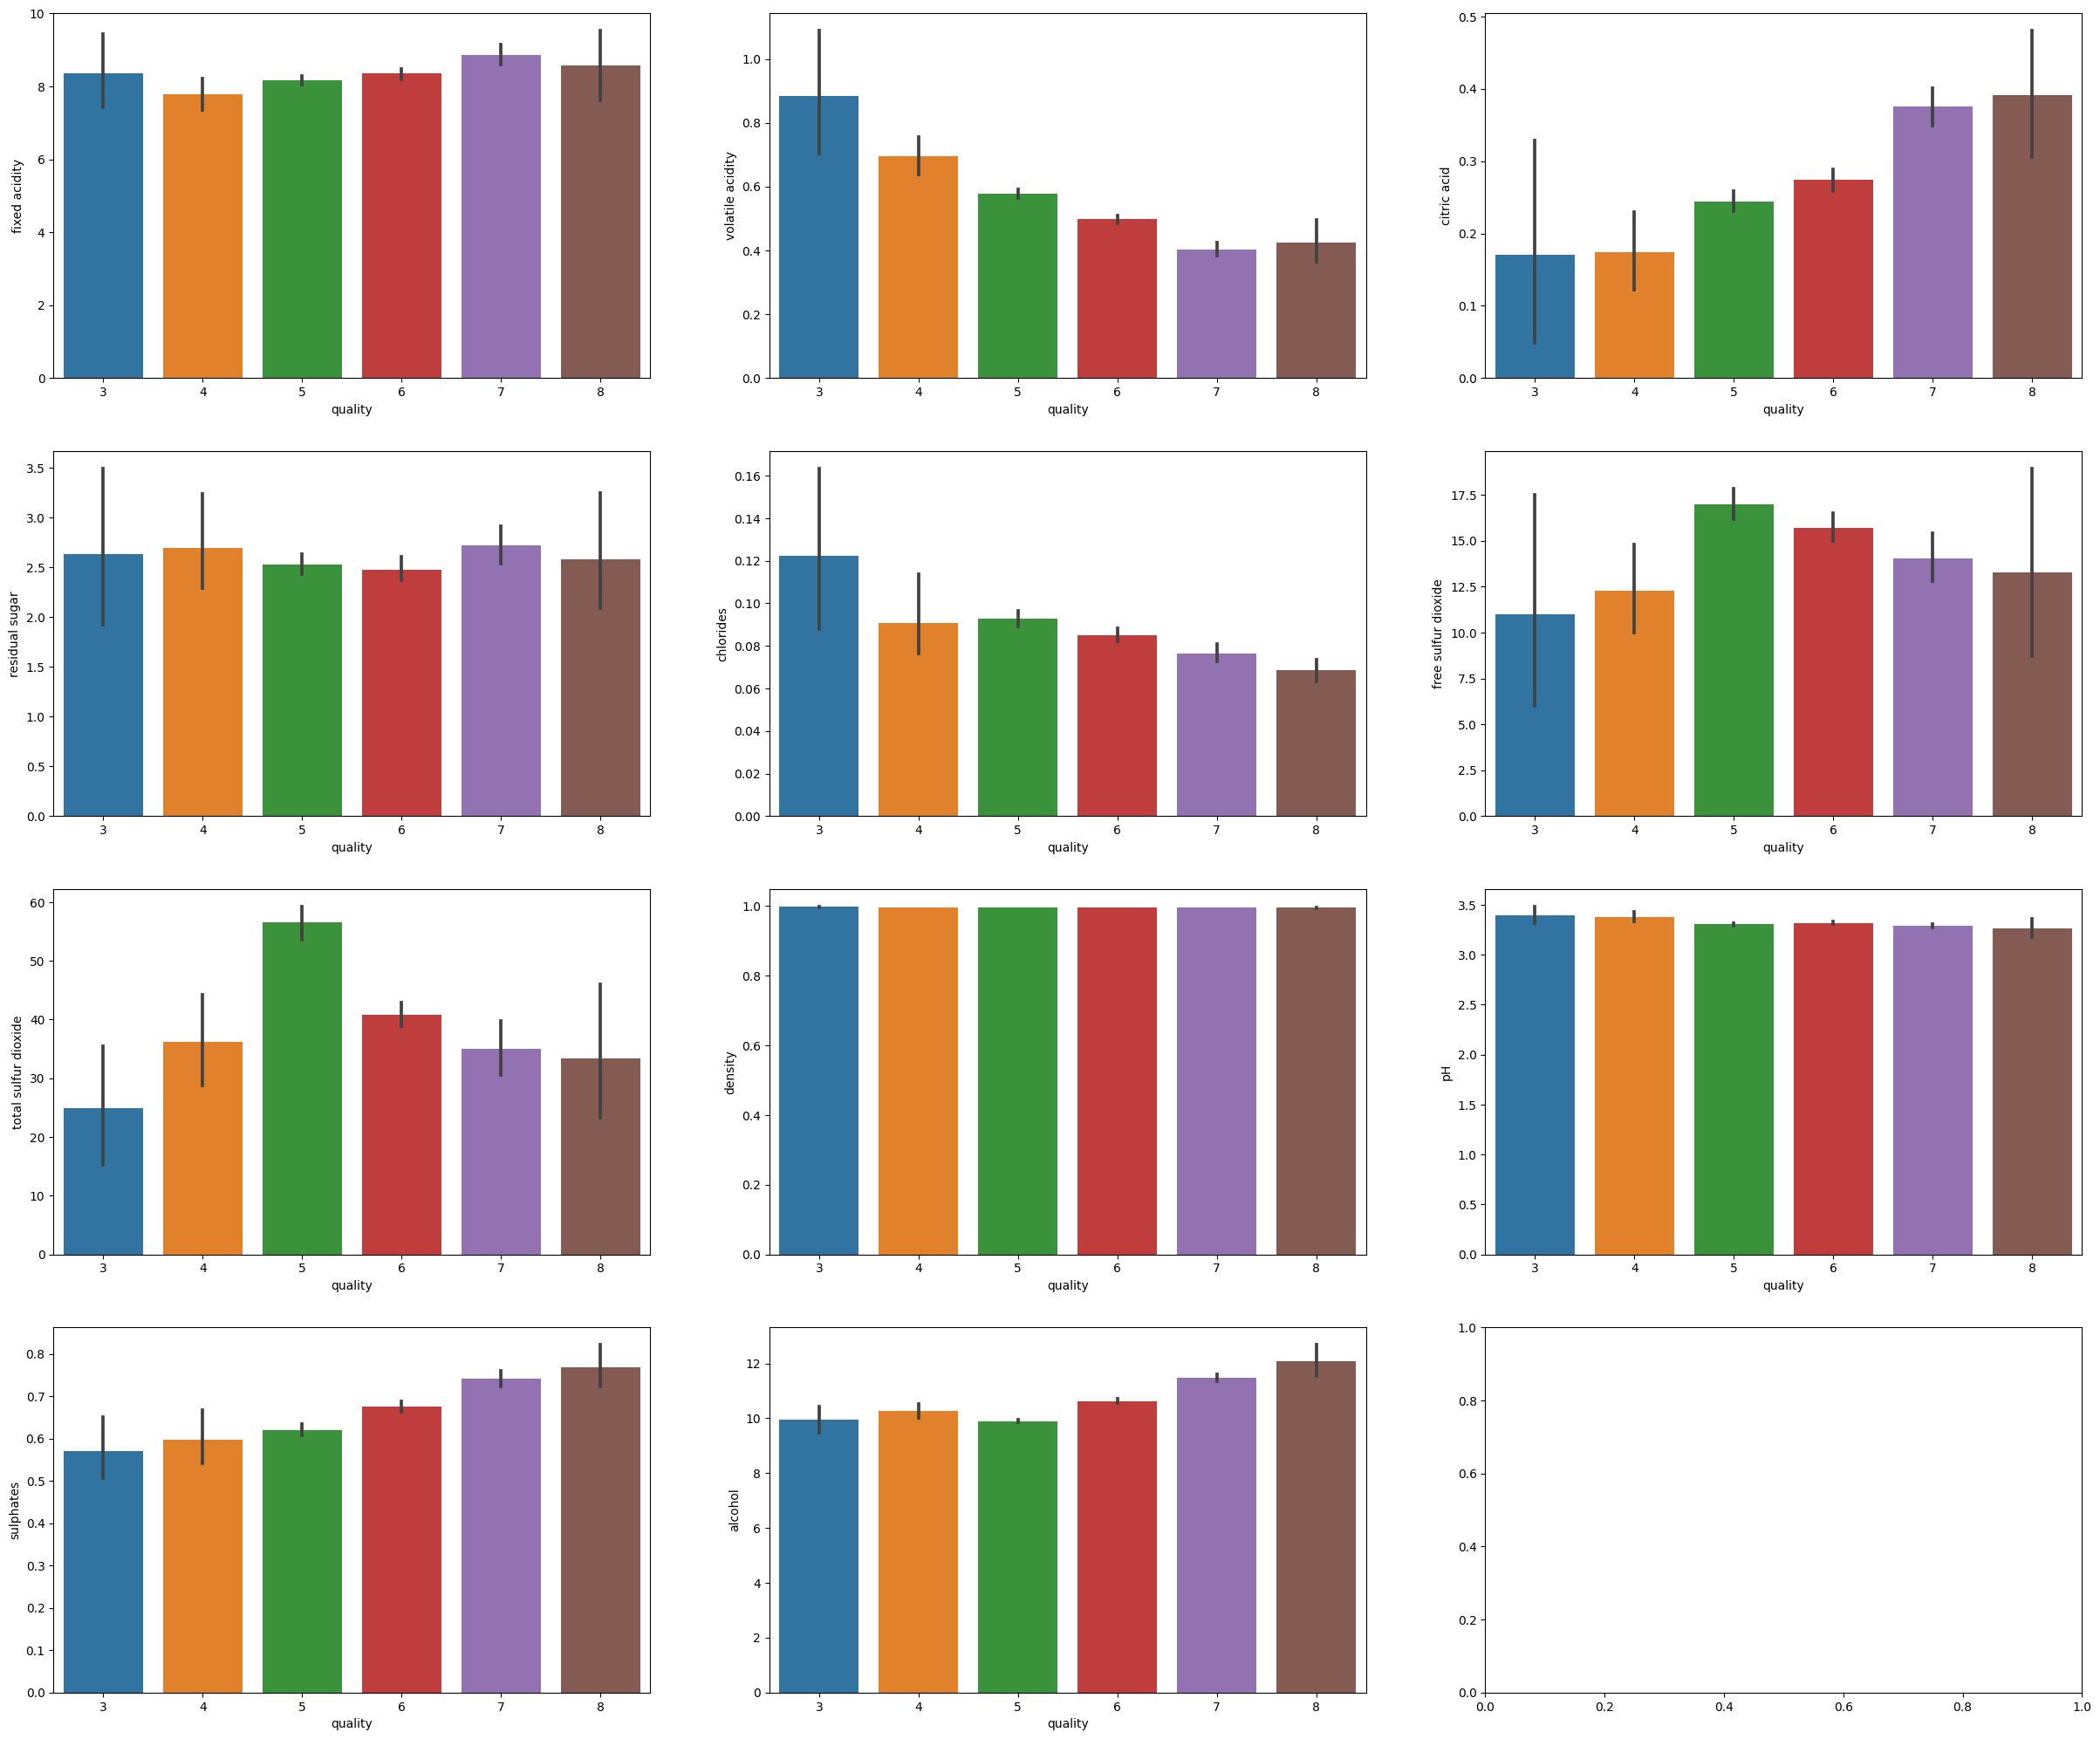

In [11]:
plot, axes = plt.subplots(4, 3, figsize = [30, 25])

sns.barplot(ax = axes[0, 0], data = df, x = 'quality', y = 'fixed acidity')
sns.barplot(ax = axes[0, 1], data = df, x = 'quality', y = 'volatile acidity')
sns.barplot(ax = axes[0, 2], data = df, x = 'quality', y = 'citric acid')
sns.barplot(ax = axes[1, 0], data = df, x = 'quality', y = 'residual sugar')
sns.barplot(ax = axes[1, 1], data = df, x = 'quality', y = 'chlorides')
sns.barplot(ax = axes[1, 2], data = df, x = 'quality', y = 'free sulfur dioxide')
sns.barplot(ax = axes[2, 0], data = df, x = 'quality', y = 'total sulfur dioxide')
sns.barplot(ax = axes[2, 1], data = df, x = 'quality', y = 'density')
sns.barplot(ax = axes[2, 2], data = df, x = 'quality', y = 'pH')
sns.barplot(ax = axes[3, 0], data = df, x = 'quality', y = 'sulphates')
sns.barplot(ax = axes[3, 1], data = df, x = 'quality', y = 'alcohol')

plt.show()

### Data Preprocessing

* x and y splitting

In [12]:
x = df.drop(columns = ['quality'], axis = 1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [13]:
# Label Binarization

# Let the wine be good (1) if quality >= 7, else wine is bad (0)
y = df['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0 )
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

* Train Test split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 2
)

In [15]:
x_train.shape, x_test.shape

((1279, 11), (320, 11))

# Task 4.3 --> Machine Learning Model Building

### Logistic Regression

In [16]:
# Model initialization
log_reg = LogisticRegression()

In [17]:
# Training the model
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# Predictions
log_reg_xtest_prediction = log_reg.predict(x_test)

In [19]:
# Evaluation
log_reg_test_data_accuracy = accuracy_score(y_test, log_reg_xtest_prediction) * 100
print(f"Accuracy = {log_reg_test_data_accuracy} %")

Accuracy = 88.75 %


### Decision Tree Regression

In [20]:
# Model initialization
dtr = DecisionTreeRegressor()

In [21]:
# Training the model
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [22]:
# Predictions
dtr_xtest_prediction = dtr.predict(x_test)

In [23]:
# Evaluation
dtr_test_data_accuracy = accuracy_score(y_test, dtr_xtest_prediction) * 100
print(f"Accuracy = {dtr_test_data_accuracy} %")

Accuracy = 87.1875 %


### Decision Tree Classifier

In [24]:
# Model initialization
dtc = DecisionTreeClassifier()

In [25]:
# Training the model
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
# Predictions
dtc_xtest_prediction = dtc.predict(x_test)

In [27]:
# Evaluation
dtc_test_data_accuracy = accuracy_score(y_test, dtc_xtest_prediction) * 100
print(f"Accuracy = {dtc_test_data_accuracy} %")

Accuracy = 88.4375 %


### Random Forest Classifier

In [28]:
# Model initialization
rfc = RandomForestClassifier()

In [29]:
# Training the model
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
# Predictions
rfc_xtest_prediction = rfc.predict(x_test)

In [31]:
# Evaluation
rfc_test_data_accuracy = accuracy_score(y_test, rfc_xtest_prediction) * 100
print(f"Accuracy = {rfc_test_data_accuracy} %")

Accuracy = 92.5 %


### K Neighbors Classifier

In [32]:
# Model initialization
knn = KNeighborsClassifier()

In [33]:
# Training the model
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [34]:
# Predictions
knn_xtest_prediction = knn.predict(x_test)

In [35]:
# Evaluation
knn_test_data_accuracy = accuracy_score(y_test, knn_xtest_prediction) * 100
print(f"Accuracy = {knn_test_data_accuracy} %")

Accuracy = 88.75 %


### Naive Bayes Classifier

In [36]:
# Model initialization
gnb = GaussianNB()

In [37]:
# Training the model
gnb.fit(x_train, y_train)

GaussianNB()

In [38]:
# Predictions
gnb_xtest_prediction = gnb.predict(x_test)

In [39]:
# Evaluation
gnb_test_data_accuracy = accuracy_score(y_test, gnb_xtest_prediction) * 100
print(f"Accuracy = {gnb_test_data_accuracy} %")

Accuracy = 82.1875 %


# Task 4.4 --> Evaluate the model

### Accuracy Scores

In [40]:
all_models = [
    "Logistic Regression",
    "Decision Tree Regression",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "K Neighbors Classifier",
    "Naive Bayes Classifier"
]

In [41]:
all_accuracy_scores = [
    log_reg_test_data_accuracy,
    dtr_test_data_accuracy,
    dtc_test_data_accuracy,
    rfc_test_data_accuracy,
    knn_test_data_accuracy,
    gnb_test_data_accuracy
]

for i in range(len(all_models)):
    print(f"{all_models[i]}: {round(all_accuracy_scores[i], 2)} % \n")

Logistic Regression: 88.75 % 

Decision Tree Regression: 87.19 % 

Decision Tree Classifier: 88.44 % 

Random Forest Classifier: 92.5 % 

K Neighbors Classifier: 88.75 % 

Naive Bayes Classifier: 82.19 % 



### Classification Reports

In [42]:
all_predictions = [
    log_reg_xtest_prediction,
    dtr_xtest_prediction,
    dtc_xtest_prediction,
    rfc_xtest_prediction,
    knn_xtest_prediction,
    gnb_xtest_prediction
]

for i in range(len(all_models)):
    print(f"{all_models[i]} Model:\n")
    print(classification_report(y_test, all_predictions[i]))
    print("\n")
    print("-------------------" * 3)
    print("\n")

Logistic Regression Model:

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       279
           1       0.60      0.37      0.45        41

    accuracy                           0.89       320
   macro avg       0.76      0.67      0.70       320
weighted avg       0.87      0.89      0.88       320



---------------------------------------------------------


Decision Tree Regression Model:

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       279
           1       0.50      0.61      0.55        41

    accuracy                           0.87       320
   macro avg       0.72      0.76      0.74       320
weighted avg       0.88      0.87      0.88       320



---------------------------------------------------------


Decision Tree Classifier Model:

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       279
           1       

# Task 4.5 --> Test with random observation

In [43]:
# Taking mean from each feature/column as the input data
data = (
    round(df['fixed acidity'].mean(), 6),
    round(df['volatile acidity'].mean(), 6),
    round(df['citric acid'].mean(), 6),
    round(df['residual sugar'].mean(), 6),
    round(df['chlorides'].mean(), 6),
    round(df['free sulfur dioxide'].mean(), 6),
    round(df['total sulfur dioxide'].mean(), 6),
    round(df['density'].mean(), 6),
    round(df['pH'].mean(), 6),
    round(df['sulphates'].mean(), 6),
    round(df['alcohol'].mean(), 6)
)
print("\nInput data =", data)

# Predicting result using Random Forest Classifier
# because it has the highest accuracy_score
input = np.asarray(data)
reshaped_input = input.reshape(1, -1)
pred = rfc.predict(reshaped_input)

# Printing result
if pred[0] == 1:
    print("\nGOOD QUALITY wine.")
else:
    print("\nPOOR QUALITY wine.")


Input data = (8.319637, 0.527821, 0.270976, 2.538806, 0.087467, 15.874922, 46.467792, 0.996747, 3.311113, 0.658149, 10.422983)

POOR QUALITY wine.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
